<a href="https://colab.research.google.com/github/MiguelAngeloTr/Aprendizaje_Automatico/blob/main/SEMANA_2_3/EJEMPLO_PERCEPTRON/C3_Ejemplo_Perceptron_Caso_AND_full_UAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Ejemplo Perceptron Caso AND***

Esta versión usa el algoritmo de clase **Perceptron**:


*   Permite escoger la **función de activación** a usar: Step function o Bipolar Step function. [Por defecto Bipolar Step function]

*   Permite seleccionar **entre dos métodos para la inicialización de los pesos sinápticos y bias aleatorios**. Uno más eficiente que el otro, con el objetivo de poder visualizar el cambio en el error por cada época de entrenamiento y así la complejidad en la convergencia del algoritmo. [Por defecto el método más óptimo]


Desarrollado por: Profesor Felipe Palta

felpalta@uao.edu.co

**Asignatura:** Aprendizaje de máquina

**Clase:** 3

**Fecha:** 25/04/2024

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Se inicializa los datos de una compuerta AND tradicional:

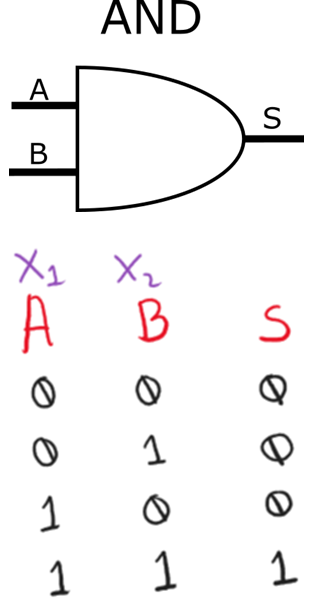

Observar, que el valor del vector y, esta saturado entre -1 y 1, dado que más adelante se pretende realizar el entrenamiento con la función de activación Escalon Binario Bipolar.

Si desea, replique el ejercicio usando los valores de 0 y 1, pero tenga presente que deberá de cambiar la función de activación cuando inicialice el Perceptron.

In [ ]:
# Datos de entrada
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida deseadas
y = np.array([1, 1, 1, -1])

print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


Gráfico de la tabla de la verdad de la compuerta AND:

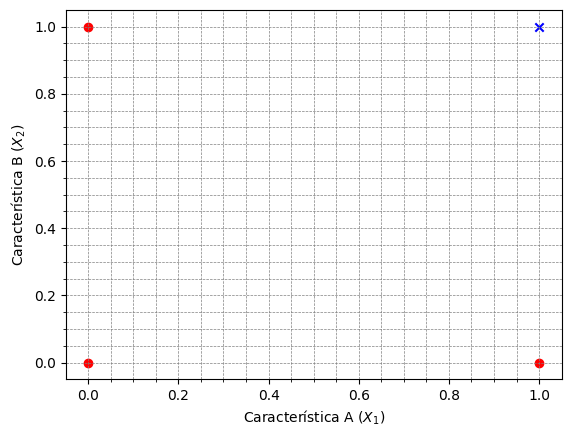

In [ ]:
# Graficar los datos de la tabla AND
plt.scatter(X[0:3, 0], X[0:3, 1],
            color='red', marker='o', label='Clase 0')
plt.scatter(X[3, 0], X[3, 1],
            color='blue', marker='x', label='Clase 1')

#Activar la grilla (líneas menores de la cuadrícula)
plt.minorticks_on()

#Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

#Colocar las etiquetas
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')

#plt.savefig('AND_space.png', dpi=300)
plt.show()

Clase **Perceptron**

Documentada mediante comentarios:

In [ ]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

Se inicializa el objeto tipo **Perceptron** teniendo en cuenta que la función de activación es Escalon Binario Bipolar (Así se definió los valores de y anteriormente) y para efectos de visualización se usa el método de pesos aleatorios menos eficiente (para ver los efectos de una convergencia lenta):

In [ ]:
ppn =Perceptron(eta=0.2, n_iter=100, Af='bipolar_step_function', Rw=1)

In [ ]:
ppn.fit(X,y)

Se observa la variabilidad de los valores de bias, w1 y w2 a lo largo de cada iteración:

In [ ]:
print(ppn.w_historical)

[array([ -4.14889976,  11.01622467, -24.99428126]), array([ -3.34889976,  11.01622467, -24.59428126]), array([ -2.54889976,  11.01622467, -24.19428126]), array([ -1.74889976,  11.01622467, -23.79428126]), array([ -0.94889976,  11.01622467, -23.39428126]), array([ -0.14889976,  11.01622467, -22.99428126]), array([  0.65110024,  11.01622467, -22.59428126]), array([  1.05110024,  11.01622467, -22.19428126]), array([  1.45110024,  11.01622467, -21.79428126]), array([  1.85110024,  11.01622467, -21.39428126]), array([  2.25110024,  11.01622467, -20.99428126]), array([  2.65110024,  11.01622467, -20.59428126]), array([  3.05110024,  11.01622467, -20.19428126]), array([  3.45110024,  11.01622467, -19.79428126]), array([  3.85110024,  11.01622467, -19.39428126]), array([  4.25110024,  11.01622467, -18.99428126]), array([  4.65110024,  11.01622467, -18.59428126]), array([  5.05110024,  11.01622467, -18.19428126]), array([  5.45110024,  11.01622467, -17.79428126]), array([  5.85110024,  11.01622

Se observa como la convergencia no es tan rápida hasta alcanzar el valor de 0:

In [ ]:
print(ppn.errors_)

[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Se realiza un gráfico del error para observar el desempeño a lo largo de las épocas:

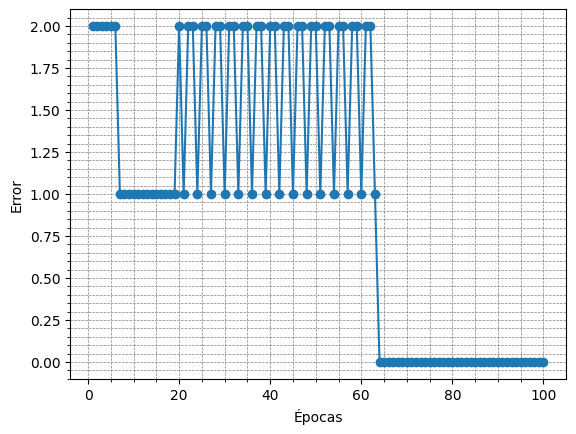

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

#Activar la grilla (líneas menores de la cuadrícula)
plt.minorticks_on()

#Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

plt.xlabel('Épocas')
plt.ylabel('Error')

plt.savefig('Grafico del error.png', dpi=300)

De manera analítica, se evalua la variabilidad de los **hiperparámetros ** bias, w1 y w2 en función de las iteraciones hasta llegar la convergencia (Solución del algoritmo) cuando el error es igual a 0:

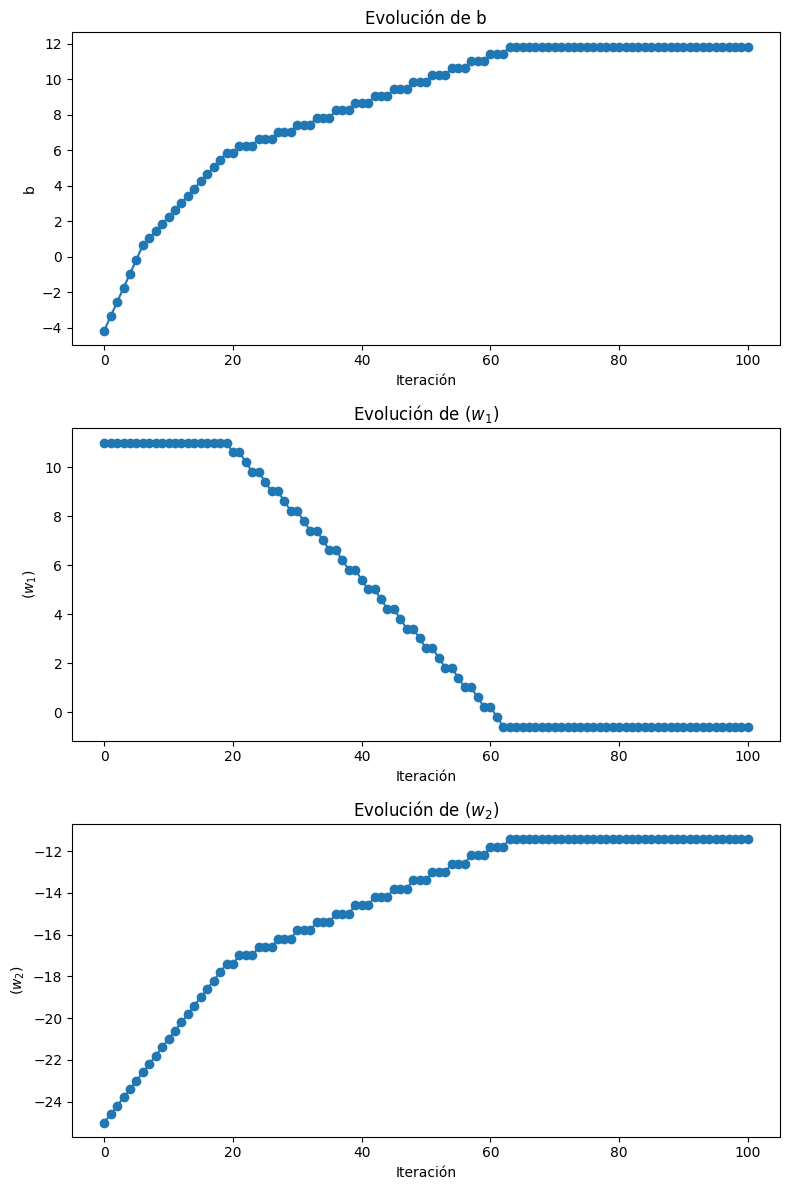

In [ ]:
import matplotlib.pyplot as plt

# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)']

# Crear tres subgráficos
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se toma los valores de bias, w1 y w2 iniciales (generados aleatoriamente) para intentar observar la solución generada:

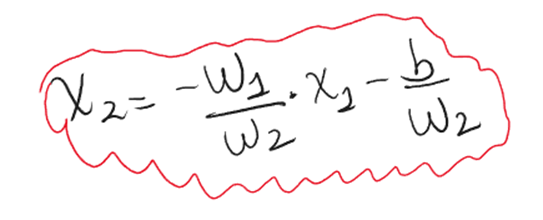


A continuación se puede observar los valores iniciales que están distribuidos de la siguiente manera:



*   **w_historial[0][0]** = bias
*   **w_historial[0][1]** = w1
*   **w_historial[0][2]** = w2








In [ ]:
print(ppn.w_historical[0])

[ -4.14889976  11.01622467 -24.99428126]


Del gráfico siguiente, se puede observar como los valores iniciales aleatorios, no generan la separabilidad entre las clases.

Se debería tener toda la suerte del mundo, para que los valores aleatorios iniciales generen una respuesta adecuada (NO SUCEDE), por eso justamente toca iterar el algoritmo para conseguir mejoras hasta llegar al error 0.

Text(0.5, 1.0, 'Linea de separación para pesos iniciales aleatorios')

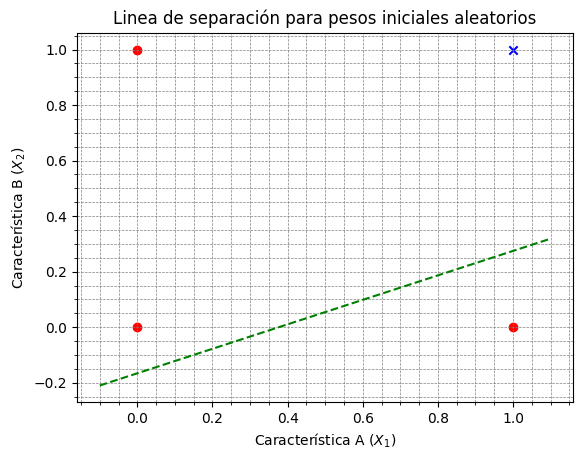

In [ ]:
# Graficar los datos de la tabla AND
plt.scatter(X[0:3, 0], X[0:3, 1],
            color='red', marker='o', label='Clase 0')
plt.scatter(X[3, 0], X[3, 1],
            color='blue', marker='x', label='Clase 1')

#Activar la grilla (líneas menores de la cuadrícula)
plt.minorticks_on()

#Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])

# Generar valores equiespaciados para X1
X1 = np.arange(x1_min - 0.1, x1_max + 0.1, 0.1)

Lw_historical = len(ppn.w_historical)

vectorW_temp = ppn.w_historical[0]

b= vectorW_temp[0]
w1= vectorW_temp[1]
w2= vectorW_temp[2]


# Calcular los valores correspondientes de X2
X2 = -(w1/w2) * X1 - (b/w2)

# Graficar la ecuación
plt.plot(X1, X2, color='green', linestyle='--', label='Ecuación')


#Colocar las etiquetas
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')
#Colocar títulos
plt.title('Linea de separación para pesos iniciales aleatorios')

A continuación y de modo didáctico, se ha realizado la graficación cíclica desde los pesos y bias aleatorios iniciales hasta la última iteración con el objetivo de ver la respuesta transitoria en el proceso de entrenamiento del perceptron hasta su convergencia final:

Nota: Tenga la libertad, de repetir este proceso varias oportunidades, variando el valor del **coeficiente de aprendizaje** para validar la respuesta.

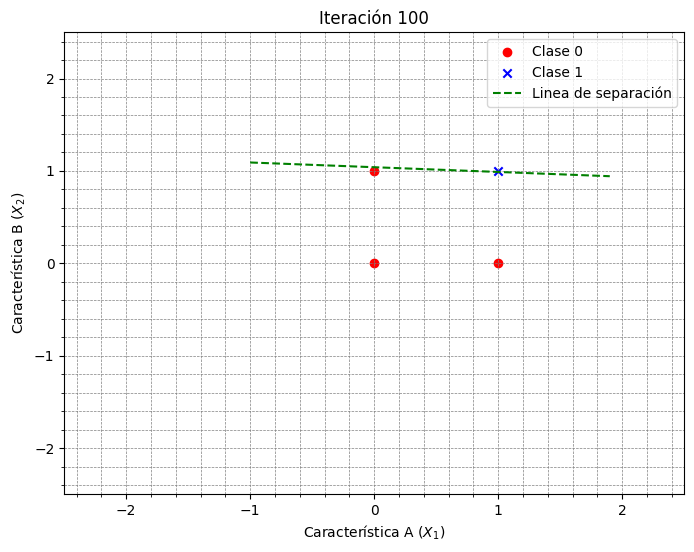

In [ ]:
from IPython import display
import time

# Supongamos que ppn.w_historical contiene los datos de la historia de los pesos

# Crear una figura de matplotlib con un tamaño específico
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # 1 fila, 1 columna, primer gráfico

# Definir la función que traza la línea correspondiente a los pesos dados
def plot_line(w_historical, line):
    b = w_historical[0]
    w1 = w_historical[1]
    w2 = w_historical[2]
    X2 = -(w1 / w2) * X1 - (b / w2)
    line.set_data(X1, X2)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(2)

# Graficar los datos de la tabla AND
ax.scatter(X[0:3, 0], X[0:3, 1], color='red', marker='o', label='Clase 0')
ax.scatter(X[3, 0], X[3, 1], color='blue', marker='x', label='Clase 1')

# Activar la grilla (líneas menores de la cuadrícula)
ax.minorticks_on()

# Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])

# Generar valores equiespaciados para X1
X1 = np.arange(x1_min - 1, x1_max + 1, 0.1)

Lw_historical = len(ppn.w_historical)

# Inicializar la línea
line, = ax.plot([], [], color='green', linestyle='--', label='Linea de separación')

# Establecer los límites de los ejes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# Colocar las etiquetas
ax.set_xlabel('Característica A ($X_1$)')
ax.set_ylabel('Característica B ($X_2$)')
ax.legend()

# Iterar sobre los vectores en ppn.w_historical
for i in range(Lw_historical):

    if(i == 0):
        ax.set_title('Pesos aleatorios iniciales')
    else:
        ax.set_title(f'Iteración {i}')

    # Graficar la línea correspondiente a los pesos actuales
    plot_line(ppn.w_historical[i], line)
    # Cambiar el título del gráfico con el número de iteración

# Cerrar la figura después de que termine el bucle for
plt.close()

# Mostrar el gráfico final
plt.show()


Se crea una función para poder colear la superficie de decisión:

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

Se muestra la superficie de decisión:

<ipython-input-20-1cc7e937ad2c>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


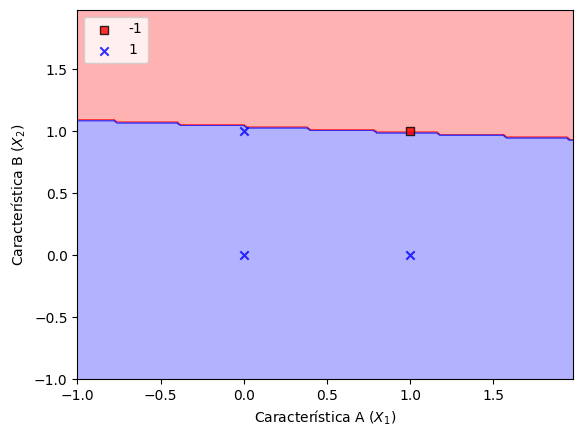

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Característica A ($X_1$)')
plt.ylabel('Característica B ($X_2$)')
plt.legend(loc='upper left')
plt.show()


Se realiza una predicción básica para el caso de que ingresara por ejemplo la muestra de entrada X1= 0 y X2 = 1.5

In [ ]:
print(ppn.predict([0,1.5]))

-1
